# 딥러닝을 이용한 예측

1. x에 데이터를 저장, y에는 클래스 데이터를 저장.
2. LabelEncoder() 함수를 사용하여 클래스의 이름을 0,1로 변환. fit으로 훈련을 한 후, transform으로 전환. (만약, 다중 분류일 경우, keras.utils.to_categorical() 함수를 사용하여 one-hot encoding을 실행.)
3. model에 Sequential()을 객체화 시킨 후, Dense를 사용하여 노드를 만듦.
4. model.compile에서 loss는 이중 분류일 경우 binary_crossentropy를 주로 사용하고, 다중 분류일 경우 categorical_crossentropy를 사용. metrics는 이중 분류일 경우 sigmoid, 다중 분류일 경우 softmax를 사용.
5. model.fit을 이용하여 훈련을 진행.(epochs와 batch_size 선정.)
6. evaluate를 이용하여 loss(오차)와 accuracy(정확도)를 출력.

## 136p 피마 인디언 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../교재 코드/deeplearning-for-everyone-2nd-master/dataset/pima-indians-diabetes.csv',
                names = ['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'BMI', 'pedigree',
                        'age', 'class'])

# diabetes(당뇨)

In [3]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


피마 인디언의 클래스(당뇨에 걸린 사람(1), 당뇨에 걸리지 않은 사람(0)으로 참과 거짓으로 나눌 수 있다.)는 두 개 이다.

즉, <span style = 'color:red'>참과 거짓을 구분하는 문제</span>이다.(<span style = 'color:red'>이항 분류(binary_crossentropy)</span>)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
new_df = df[['pregnant', 'class']].groupby(['pregnant']).mean()
new_df

,class
pregnant,
0,0.342342
1,0.214815
2,0.184466
3,0.360000
4,0.338235
5,0.368421
6,0.320000
7,0.555556
8,0.578947


In [8]:
new_df = df[['pregnant', 'class']].groupby(['pregnant'], as_index = False).mean()
new_df                                            # as_index = False를 사용하면 위쪽에 나온 것을 내려줌(새로운 인덱스 설정?)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


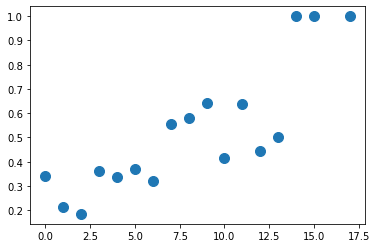

In [9]:
plt.scatter(new_df['pregnant'], new_df['class'], s = 100)
plt.show()                                                # 여기서 class는 당뇨가 걸린 사람을 1, 그렇지 않은 사람을 0

# 임신 횟수에 따라 당뇨병 횟수가 얼마나 증가하는 것인지 알기 위해서 회귀분석을 사용해야한다

0.04315032084767641 0.17597178714709932


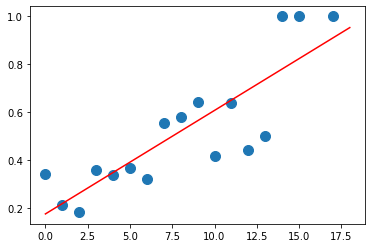

In [10]:
m, b = np.polyfit(new_df['pregnant'], new_df['class'], deg = 1)            # m = 기울기, b = 바이어스
print(m, b)

plt.scatter(new_df['pregnant'], new_df['class'], s = 100)
plt.plot(np.arange(0, 19), m*np.arange(0, 19) + b, c = 'red')
plt.show()

In [11]:
df.corr()                                        # corr: 특성간의 연관성을 수치로 나타냄

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# [Correlation(상관 분석)](https://en.wikipedia.org/wiki/Correlation)

연관성에는 제 3의 특성이 끼어들 수 있기 때문에 회귀 분석을 사용하기에는 문제점이 많다.

다만, 인과성일 경우(원인과 결과)에는 회귀 분석에 알맞다고 할 수 있다.(상관분석)

$$ Corr(x, y) = \frac{\sum_{i=1}^n{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{Var(x)}*\sqrt{Var(y)}} $$

- -1 < Corr < 1
- Corr -> 1 일 경우, 양의 상관성
- Corr -> -1 일 경우, 음의 상관성
- Corr = 0 일 경우, 무상관성(예측할 수 없다.)

In [12]:
cmap = plt.colormaps()
cmap

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

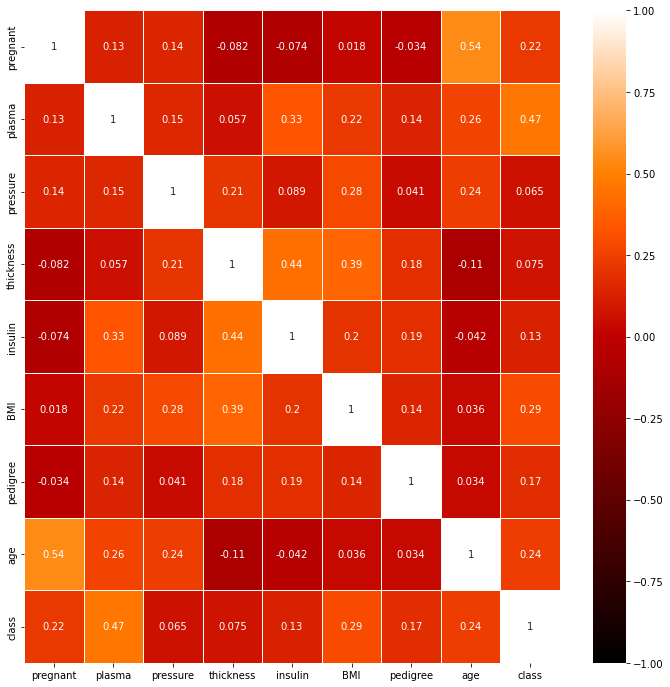

In [13]:
import seaborn as sns

plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), cmap = plt.cm.gist_heat, annot = True, linewidths = 1,
           vmax = 1, vmin = -1)                                                   # vmax, vmin : 범위 정하기(-1에서 1 사이가 좋음)
plt.show()

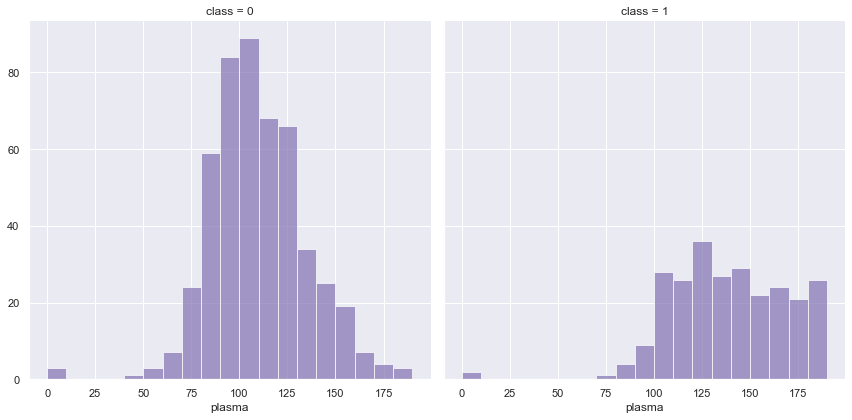

In [14]:
sns.set(color_codes = True)

bins = range(0, 200, 10)
grid = sns.FacetGrid(df, col = 'class', height = 6)
grid.map(plt.hist, 'plasma', bins = bins, color = 'm', alpha = 0.7)
plt.show()

In [15]:
from tensorflow import keras
import tensorflow as tf

In [16]:
from tensorflow.keras.layers import Dense

In [17]:
np.random.seed(3)
tf.random.set_seed(3)

In [18]:
type(df)

pandas.core.frame.DataFrame

In [19]:
x = df.iloc[:, :8].to_numpy()
y = df.iloc[:, 8].to_numpy()

In [20]:
model = keras.Sequential()
model.add(keras.layers.Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


- output_shape : 생성된 노드의 개수

- layer : input_dim, 입력된 데이터의 개수

- param : 우리가 추정해야할 파라미터, 8 * 12 + 12(바이어스), 12 * 8 + 8(바이어스), 8 +1(바이어스)

$$ y = \delta(w_1z_1 + w_2z_2 + ... + w_{12}z_{12})$$

$$ y = \frac{1}{1 + e^{(w_1z_1 + w_2z_2 + ... + w_{12}z_{12})}} $$

In [22]:
model.compile(loss = 'binary_crossentropy',                            # output 2개 이하이므로 binary_crossentropy
             optimizer = 'adam',                                         # (둘 중 하나를 결정하는 이항 분류(binary_crossentropy))
             metrics = 'accuracy')

In [23]:
model.fit (x, y, epochs = 100, batch_size = 10)

Epoch 1/100
77/77 [==============================] - 0s 396us/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/100
77/77 [==============================] - 0s 414us/step - loss: 5.4367 - accuracy: 0.6029
Epoch 3/100
77/77 [==============================] - 0s 440us/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/100
77/77 [==============================] - 0s 427us/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/100
77/77 [==============================] - 0s 432us/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/100
77/77 [==============================] - 0s 427us/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/100
77/77 [==============================] - 0s 427us/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/100
77/77 [==============================] - 0s 427us/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/100
77/77 [==============================] - 0s 427us/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/100
77/77 [==============================] - 0s 427us/step - loss: 0.6656 - accur

여러 번 돌릴수록 성능이 증가하지만 너무 많이 돌리면 오버피팅이 될 수 있다.

## 150p 붓꽃 데이터

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
# df = pd.read_csv('../교재 코드/deeplearning-for-everyone-2nd-master/dataset/iris.csv', 
#                  names = ['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width', 'species'])

df = sns.load_dataset('iris')

In [26]:
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


붓꽃의 데이터는 클래스(species(품종))가 2개(참(1) 혹은 거짓(0))가 아닌 여러 개이다.

즉, <span style = 'color:red'>여러 개 중에 어떤 것이 정답인지를 예측하는 문제</span>이다. (<span style = 'color:red'>다항 분류(categorical_crossentropy)</span>)

<Figure size 864x864 with 0 Axes>

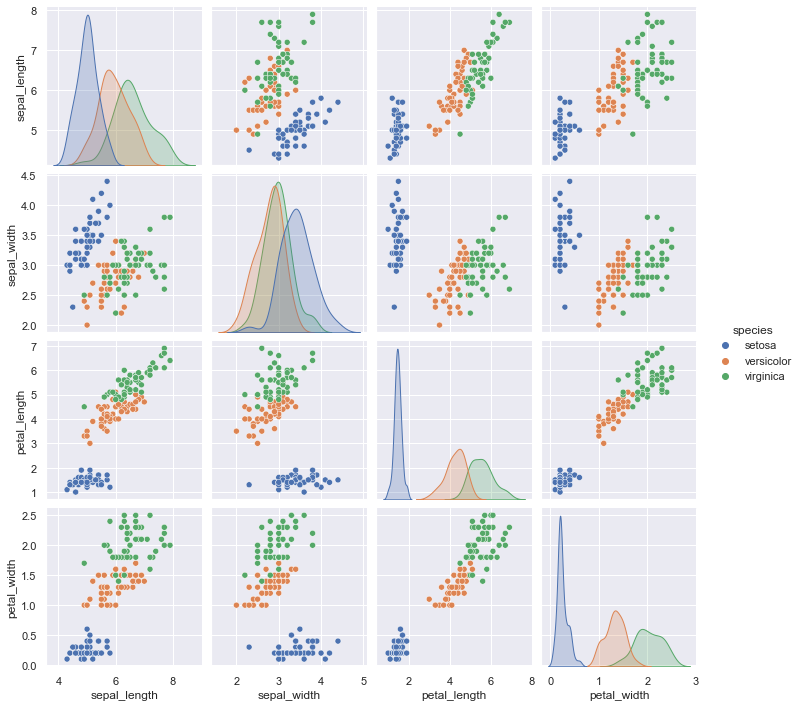

In [27]:
plt.figure(figsize = (12, 12))
sns.pairplot(df, hue = 'species')
plt.show()

## 딥러닝에 맞는 형식으로 데이터 변환 시키기

In [28]:
df.head()

dataset = df.values
print(type(dataset))
dataset

x = dataset[: ,:4].astype(np.float32)                 # 문자열 형태로 지정되어 있는 숫자를 float 형태로 변환
y = dataset[:, -1]

print(x.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
float32
object


In [29]:
e = LabelEncoder()                       # 문자열을 숫자로 바꿔주려면 클래스 이름을 숫자 형태로 바꿔줘야함.
                                         # array(['Iris-setosa', 'Iris', ...]) 로 지정되어 있던 것이 array([1, 2, 3])으로 변환.
e.fit(y)                        # 변환 클래스를 y에 대해 훈련시킴
y = e.transform(y)              # 훈련시킨 클래스를 y에 적용.

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- <span style = 'color:red'>LabelEncoder</span>는 문자열 형태를 숫자로 바꿔주는 클래스로 <span style = 'color:red'>첫번째 문자를 1, 두번째 문자를 2, 세번째 문자를 3의 형식으로 변환</span>한다.

- 즉, <span style = 'color:red'>클래스의 이름을 숫자의 형태로 바꿔준 것</span>이다.

## <span style = 'color:red'>One-hot encoding</span>

one-hot encoding이 먼저 끝난 후, softmax 사용.(one-hot encoding의 세팅이 끝난 이후에 softmax가 사용 가능하다.)

In [30]:
y_encoded = keras.utils.to_categorical(y)
y_encoded                                        # 0번 클래스일때는 첫번째가 1, 1번 클래스일때는 두번째가 1, ...

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

- 활성화 함수로 적용시키기 위해서는 y의 값이 <span style = 'color:red'>숫자 0과 1</span>로 이뤄져 있어야 한다.

- 이 조건을 만족시키기 위해 <span style = 'color:red'>keras.utils.to_categorical()</span> 함수를 사용한다.
- 즉, keras.utils.to_categorical() 함수를 사용하면 array([1, 2, 3])은 array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])의 모습으로 바뀌고 이렇게 바뀐 형태는 클래스가 가지고 있는 데이터에 적용된다.

In [31]:
model = keras.Sequential()

model.add(keras.layers.Dense(16, input_dim = 4, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))                      # output에는 특성이 3개 이상일 경우 softmax 사용

- 다중 분류이므로 softmax 사용. (softmax : 총 합이 1인 형태로 바꿔서 계산. 다시 말해, 원-핫 인코딩으로 분류해놓은 데이터를 확률로 다시 분류한 것이라고 할 수 있음.)

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss = 'categorical_crossentropy',          # output이 3개 이상이므로 categorical_crossentropy
             optimizer = 'adam',
             metrics = 'accuracy')                        # 분류의 문제일 경우 accuracy

In [34]:
model.fit(x, y_encoded, epochs = 50, batch_size = 20)

Epoch 1/50
8/8 [==============================] - 0s 375us/step - loss: 1.6382 - accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 0s 374us/step - loss: 1.4701 - accuracy: 0.3333
Epoch 3/50
8/8 [==============================] - 0s 374us/step - loss: 1.3292 - accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 0s 499us/step - loss: 1.2194 - accuracy: 0.3333
Epoch 5/50
8/8 [==============================] - 0s 499us/step - loss: 1.1297 - accuracy: 0.3333
Epoch 6/50
8/8 [==============================] - 0s 499us/step - loss: 1.0619 - accuracy: 0.3333
Epoch 7/50
8/8 [==============================] - 0s 499us/step - loss: 1.0096 - accuracy: 0.3333
Epoch 8/50
8/8 [==============================] - 0s 499us/step - loss: 0.9646 - accuracy: 0.3333
Epoch 9/50
8/8 [==============================] - 0s 374us/step - loss: 0.9298 - accuracy: 0.3333
Epoch 10/50
8/8 [==============================] - 0s 499us/step - loss: 0.9021 - accuracy: 0.3400
Epoch 11/50
8/8 [==

## 159p 과적합 피하기

In [35]:
df = pd.read_csv('../교재 코드/deeplearning-for-everyone-2nd-master/dataset/sonar.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [37]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [38]:
dataset = df.values

x = dataset[:, :60].astype(np.float32)
y = dataset[:, 60]

print(x.dtype)
print(y.dtype); print()

print(y)

float32
object

['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']


In [39]:
e = LabelEncoder()

e.fit(y)
y = e.transform(y)

print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [40]:
model = keras.Sequential()
model.add(keras.layers.Dense(24, input_dim = 60, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 24)                1464      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = 'accuracy')

In [42]:
model.fit(x, y, epochs = 20, batch_size = 5)

Epoch 1/20
42/42 [==============================] - 0s 543us/step - loss: 0.6875 - accuracy: 0.5913
Epoch 2/20
42/42 [==============================] - 0s 427us/step - loss: 0.6543 - accuracy: 0.6587
Epoch 3/20
42/42 [==============================] - 0s 427us/step - loss: 0.6367 - accuracy: 0.6587
Epoch 4/20
42/42 [==============================] - 0s 427us/step - loss: 0.6074 - accuracy: 0.6827
Epoch 5/20
42/42 [==============================] - 0s 427us/step - loss: 0.5788 - accuracy: 0.7308
Epoch 6/20
42/42 [==============================] - 0s 451us/step - loss: 0.5569 - accuracy: 0.7356
Epoch 7/20
42/42 [==============================] - 0s 451us/step - loss: 0.5263 - accuracy: 0.7548
Epoch 8/20
42/42 [==============================] - 0s 451us/step - loss: 0.4965 - accuracy: 0.7837
Epoch 9/20
42/42 [==============================] - 0s 451us/step - loss: 0.4828 - accuracy: 0.7644
Epoch 10/20
42/42 [==============================] - 0s 451us/step - loss: 0.4597 - accuracy: 0.8173

In [43]:
model.evaluate(x, y)                          # [loss, accuracy], 훈련 세트로 돌린 딥러닝의 결과는 evaluate에 loss(오차)와
                                              # accuracy(정확성, 확률)이 저장되어 있다.

7/7 [==============================] - 0s 570us/step - loss: 0.3380 - accuracy: 0.8606


[0.33795082569122314, 0.8605769276618958]

In [44]:
np.around(model.evaluate(x, y)[1], 3)                      # np.around : 소수점 나타내기.

7/7 [==============================] - 0s 570us/step - loss: 0.3380 - accuracy: 0.8606


0.861

위의 데이터를 epochs = 200 으로 돌린다면, 100%의 정확도를 가진 모델이 나오게 된다.

이것은 완벽한 모델을 만들었다는 뜻이 아니라 그만큼 과적합되었다는 뜻이다.

## 학습셋, 테스트셋

은닉층이 늘어날수록 학습셋의 예측률이 점점 올라가다보면 100%에 도달할 수 있다. 하지만 테스트셋은 일정 비율까지 올라가다가 떨어지게 된다. 즉, 식이 복잡해지고 <span style = 'color:red'>학습량이 늘어날수록 학습 데이터를 통한 예측률은 계속해서 올라가지만, 테스트셋을 이용한 예측률은 오히려 떨어지는 것을 확인할 수 있다</span>.

학습셋을 가지고 fit으로 훈련을 진행. 그 후, 테스트셋을 가지고 evaluate로 오차와 정확도를 측정.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [47]:
x_train.shape

(145, 60)

In [48]:
x_test.shape

(63, 60)

In [49]:
model = keras.Sequential()

model.add(keras.layers.Dense(24, input_dim = 60, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 24)                1464      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = 'accuracy')

In [51]:
model.fit(x_train, y_train, epochs = 130, batch_size = 5)                    # 학습셋을 사용하여 훈련 진행.

Epoch 1/130
29/29 [==============================] - 0s 469us/step - loss: 0.6935 - accuracy: 0.4966
Epoch 2/130
29/29 [==============================] - 0s 447us/step - loss: 0.6794 - accuracy: 0.5586
Epoch 3/130
29/29 [==============================] - 0s 447us/step - loss: 0.6665 - accuracy: 0.5931
Epoch 4/130
29/29 [==============================] - 0s 413us/step - loss: 0.6539 - accuracy: 0.6483
Epoch 5/130
29/29 [==============================] - 0s 447us/step - loss: 0.6438 - accuracy: 0.6276
Epoch 6/130
29/29 [==============================] - 0s 447us/step - loss: 0.6312 - accuracy: 0.7172
Epoch 7/130
29/29 [==============================] - 0s 447us/step - loss: 0.6105 - accuracy: 0.7034
Epoch 8/130
29/29 [==============================] - 0s 413us/step - loss: 0.5971 - accuracy: 0.7103
Epoch 9/130
29/29 [==============================] - 0s 447us/step - loss: 0.5834 - accuracy: 0.7241
Epoch 10/130
29/29 [==============================] - 0s 413us/step - loss: 0.5607 - accura

In [52]:
model.save('my_model.h5')                       # 확장자 h5로 파일을 저장. (모델 전체를 저장.)

In [53]:
model_re = keras.models.load_model('my_model.h5')       # 저장해놓은 모델 불러오기.

In [54]:
model_re.evaluate(x_test, y_test)[1]            # 훈련 세트에서는 1(100%)가 나왔는데 테스트 세트에서는 74%(오버피팅)이 나옴.
                                     # 테스트셋을 가지고 오차와 정확도 분석하기.

2/2 [==============================] - 0s 1ms/step - loss: 0.9123 - accuracy: 0.7460


0.7460317611694336

## k-교차 검증

데이터셋을 k 등분으로 나눠 그 중, 하나의 조각을 남겨놓고 훈련을 진행, 이 과정을 경우의 수만큼 반복.

In [55]:
from sklearn.model_selection import StratifiedKFold               # 전체를 균등하게 나눠서 한 쪽으로 뭉치지 않게 함.
                                                                   # 학습셋과 테스트셋으로 나누는 함수 -> StratifiedkFold
n_fold = 10
skf = StratifiedKFold(n_splits = n_fold, shuffle = True, random_state = 0)       # [학습셋, 테스트셋]이 저장되어있다.

In [59]:
skf

StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

- n_split : 몇 등분으로 데이터셋을 쪼갤 것인가.
- shuffle : 나눈 데이터를 섞을 것인가.

for 구문으로 묶어 쪼갠 데이터셋의 수만큼 반복하게 만듦.

In [56]:
accuracy = []

for train, test in skf.split(x, y):
    model = keras.Sequential()
    model.add(keras.layers.Dense(24, input_dim = 60, activation = 'relu'))
    model.add(keras.layers.Dense(10, activation = 'relu'))
    model.add(keras.layers.Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy',
                 optimizer = 'adam',
                 metrics = 'accuracy')
    
    model.fit(x[train], y[train], epochs = 100, batch_size = 5)
    k_accuracy = model.evaluate(x[test], y[test])[1]
    print(k_accuracy)
    
    accuracy.append(k_accuracy)

Epoch 1/100
38/38 [==============================] - 0s 463us/step - loss: 0.7060 - accuracy: 0.5348
Epoch 2/100
38/38 [==============================] - 0s 420us/step - loss: 0.6793 - accuracy: 0.5722
Epoch 3/100
38/38 [==============================] - 0s 446us/step - loss: 0.6617 - accuracy: 0.5882
Epoch 4/100
38/38 [==============================] - 0s 446us/step - loss: 0.6355 - accuracy: 0.6845
Epoch 5/100
38/38 [==============================] - 0s 472us/step - loss: 0.6040 - accuracy: 0.7487
Epoch 6/100
38/38 [==============================] - 0s 472us/step - loss: 0.5722 - accuracy: 0.7861
Epoch 7/100
38/38 [==============================] - 0s 420us/step - loss: 0.5459 - accuracy: 0.7754
Epoch 8/100
38/38 [==============================] - 0s 446us/step - loss: 0.5159 - accuracy: 0.7914
Epoch 9/100
38/38 [==============================] - 0s 472us/step - loss: 0.4904 - accuracy: 0.7807
Epoch 10/100
38/38 [==============================] - 0s 446us/step - loss: 0.4644 - accura

38/38 [==============================] - 0s 420us/step - loss: 0.1999 - accuracy: 0.9519
Epoch 61/100
38/38 [==============================] - 0s 446us/step - loss: 0.1958 - accuracy: 0.9358
Epoch 62/100
38/38 [==============================] - 0s 446us/step - loss: 0.1898 - accuracy: 0.9465
Epoch 63/100
38/38 [==============================] - 0s 446us/step - loss: 0.1904 - accuracy: 0.9465
Epoch 64/100
38/38 [==============================] - 0s 446us/step - loss: 0.2116 - accuracy: 0.9251
Epoch 65/100
38/38 [==============================] - 0s 446us/step - loss: 0.2014 - accuracy: 0.9198
Epoch 66/100
38/38 [==============================] - 0s 446us/step - loss: 0.1792 - accuracy: 0.9572
Epoch 67/100
38/38 [==============================] - 0s 446us/step - loss: 0.1851 - accuracy: 0.9519
Epoch 68/100
38/38 [==============================] - 0s 446us/step - loss: 0.1712 - accuracy: 0.9572
Epoch 69/100
38/38 [==============================] - 0s 446us/step - loss: 0.1633 - accuracy: 

38/38 [==============================] - 0s 446us/step - loss: 0.5812 - accuracy: 0.7701
Epoch 9/100
38/38 [==============================] - 0s 446us/step - loss: 0.5600 - accuracy: 0.7166
Epoch 10/100
38/38 [==============================] - 0s 420us/step - loss: 0.5401 - accuracy: 0.8182
Epoch 11/100
38/38 [==============================] - 0s 420us/step - loss: 0.5330 - accuracy: 0.7433
Epoch 12/100
38/38 [==============================] - 0s 420us/step - loss: 0.5102 - accuracy: 0.7540
Epoch 13/100
38/38 [==============================] - 0s 446us/step - loss: 0.5046 - accuracy: 0.7754
Epoch 14/100
38/38 [==============================] - 0s 446us/step - loss: 0.4814 - accuracy: 0.7968
Epoch 15/100
38/38 [==============================] - 0s 446us/step - loss: 0.4738 - accuracy: 0.7914
Epoch 16/100
38/38 [==============================] - 0s 446us/step - loss: 0.4703 - accuracy: 0.7914
Epoch 17/100
38/38 [==============================] - 0s 420us/step - loss: 0.4528 - accuracy: 0

38/38 [==============================] - 0s 472us/step - loss: 0.1765 - accuracy: 0.9358
Epoch 61/100
38/38 [==============================] - 0s 420us/step - loss: 0.1692 - accuracy: 0.9626
Epoch 62/100
38/38 [==============================] - 0s 420us/step - loss: 0.1686 - accuracy: 0.9519
Epoch 63/100
38/38 [==============================] - 0s 420us/step - loss: 0.1687 - accuracy: 0.9519
Epoch 64/100
38/38 [==============================] - 0s 446us/step - loss: 0.1723 - accuracy: 0.9358
Epoch 65/100
38/38 [==============================] - 0s 420us/step - loss: 0.1625 - accuracy: 0.9412
Epoch 66/100
38/38 [==============================] - 0s 420us/step - loss: 0.1552 - accuracy: 0.9412
Epoch 67/100
38/38 [==============================] - 0s 420us/step - loss: 0.1581 - accuracy: 0.9572
Epoch 68/100
38/38 [==============================] - 0s 446us/step - loss: 0.1471 - accuracy: 0.9572
Epoch 69/100
38/38 [==============================] - 0s 420us/step - loss: 0.1493 - accuracy: 

38/38 [==============================] - 0s 420us/step - loss: 0.3385 - accuracy: 0.8663
Epoch 33/100
38/38 [==============================] - 0s 446us/step - loss: 0.3309 - accuracy: 0.8770
Epoch 34/100
38/38 [==============================] - 0s 446us/step - loss: 0.3177 - accuracy: 0.8717
Epoch 35/100
38/38 [==============================] - 0s 446us/step - loss: 0.3266 - accuracy: 0.8717
Epoch 36/100
38/38 [==============================] - 0s 420us/step - loss: 0.3297 - accuracy: 0.8556
Epoch 37/100
38/38 [==============================] - 0s 446us/step - loss: 0.3100 - accuracy: 0.8770
Epoch 38/100
38/38 [==============================] - 0s 446us/step - loss: 0.3117 - accuracy: 0.8824
Epoch 39/100
38/38 [==============================] - 0s 446us/step - loss: 0.3016 - accuracy: 0.8717
Epoch 40/100
38/38 [==============================] - 0s 446us/step - loss: 0.2970 - accuracy: 0.8770
Epoch 41/100
38/38 [==============================] - 0s 420us/step - loss: 0.2935 - accuracy: 

38/38 [==============================] - 0s 446us/step - loss: 0.6455 - accuracy: 0.6738
Epoch 5/100
38/38 [==============================] - 0s 446us/step - loss: 0.6281 - accuracy: 0.7219
Epoch 6/100
38/38 [==============================] - 0s 420us/step - loss: 0.6056 - accuracy: 0.7273
Epoch 7/100
38/38 [==============================] - 0s 420us/step - loss: 0.5862 - accuracy: 0.7112
Epoch 8/100
38/38 [==============================] - 0s 420us/step - loss: 0.5621 - accuracy: 0.7647
Epoch 9/100
38/38 [==============================] - 0s 420us/step - loss: 0.5368 - accuracy: 0.7433
Epoch 10/100
38/38 [==============================] - 0s 420us/step - loss: 0.5090 - accuracy: 0.8021
Epoch 11/100
38/38 [==============================] - 0s 420us/step - loss: 0.5177 - accuracy: 0.7861
Epoch 12/100
38/38 [==============================] - 0s 420us/step - loss: 0.4793 - accuracy: 0.7754
Epoch 13/100
38/38 [==============================] - 0s 420us/step - loss: 0.4807 - accuracy: 0.775

38/38 [==============================] - 0s 420us/step - loss: 0.2336 - accuracy: 0.9091
Epoch 56/100
38/38 [==============================] - 0s 420us/step - loss: 0.2226 - accuracy: 0.9305
Epoch 57/100
38/38 [==============================] - 0s 420us/step - loss: 0.2182 - accuracy: 0.9144
Epoch 58/100
38/38 [==============================] - 0s 420us/step - loss: 0.2257 - accuracy: 0.9144
Epoch 59/100
38/38 [==============================] - 0s 420us/step - loss: 0.2060 - accuracy: 0.9305
Epoch 60/100
38/38 [==============================] - 0s 420us/step - loss: 0.2092 - accuracy: 0.9305
Epoch 61/100
38/38 [==============================] - 0s 420us/step - loss: 0.2093 - accuracy: 0.9251
Epoch 62/100
38/38 [==============================] - 0s 420us/step - loss: 0.2131 - accuracy: 0.9037
Epoch 63/100
38/38 [==============================] - 0s 446us/step - loss: 0.1980 - accuracy: 0.9358
Epoch 64/100
38/38 [==============================] - 0s 420us/step - loss: 0.1958 - accuracy: 

38/38 [==============================] - 0s 446us/step - loss: 0.3667 - accuracy: 0.8404
Epoch 28/100
38/38 [==============================] - 0s 446us/step - loss: 0.3591 - accuracy: 0.8617
Epoch 29/100
38/38 [==============================] - 0s 446us/step - loss: 0.3685 - accuracy: 0.8564
Epoch 30/100
38/38 [==============================] - 0s 446us/step - loss: 0.3564 - accuracy: 0.8351
Epoch 31/100
38/38 [==============================] - 0s 420us/step - loss: 0.3514 - accuracy: 0.8670
Epoch 32/100
38/38 [==============================] - 0s 446us/step - loss: 0.3428 - accuracy: 0.8351
Epoch 33/100
38/38 [==============================] - 0s 446us/step - loss: 0.3518 - accuracy: 0.8457
Epoch 34/100
38/38 [==============================] - 0s 420us/step - loss: 0.3353 - accuracy: 0.8670
Epoch 35/100
38/38 [==============================] - 0s 446us/step - loss: 0.3344 - accuracy: 0.8617
Epoch 36/100
38/38 [==============================] - 0s 446us/step - loss: 0.3404 - accuracy: 

1/1 [==============================] - 0s 1ms/step - loss: 0.2370 - accuracy: 0.9000
0.8999999761581421
Epoch 1/100
38/38 [==============================] - 0s 446us/step - loss: 0.6904 - accuracy: 0.5585
Epoch 2/100
38/38 [==============================] - 0s 420us/step - loss: 0.6793 - accuracy: 0.5851
Epoch 3/100
38/38 [==============================] - 0s 446us/step - loss: 0.6737 - accuracy: 0.6011
Epoch 4/100
38/38 [==============================] - 0s 472us/step - loss: 0.6614 - accuracy: 0.6330
Epoch 5/100
38/38 [==============================] - 0s 446us/step - loss: 0.6488 - accuracy: 0.6915
Epoch 6/100
38/38 [==============================] - 0s 446us/step - loss: 0.6333 - accuracy: 0.7021
Epoch 7/100
38/38 [==============================] - 0s 472us/step - loss: 0.6142 - accuracy: 0.7074
Epoch 8/100
38/38 [==============================] - 0s 446us/step - loss: 0.5863 - accuracy: 0.7181
Epoch 9/100
38/38 [==============================] - 0s 446us/step - loss: 0.5687 - accu

In [57]:
np.mean(accuracy)

0.7988095343112945

In [58]:
accuracy

[0.7142857313156128,
 0.6666666865348816,
 0.761904776096344,
 0.8571428656578064,
 0.7142857313156128,
 0.8095238208770752,
 0.9047619104385376,
 0.8095238208770752,
 0.8999999761581421,
 0.8500000238418579]